In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import matplotlib.pylab as pylab
from scipy.ndimage.filters import gaussian_filter1d

params = {'axes.titlesize': 'large',       
         'axes.labelsize': 14,
         'font.size': 13}
pylab.rcParams.update(params)

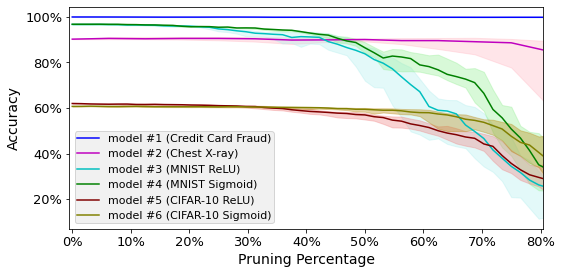

In [12]:
option_list = ['kaggle', 'chest', 'mnist-relu', 'mnist-sigmoid', 'cifar-10-relu', 'cifar-10-sigmoid'] 

model_list = ['model #1 (Credit Card Fraud)',
              'model #2 (Chest X-ray)',
              'model #3 (MNIST ReLU)',
              'model #4 (MNIST Sigmoid)',
              'model #5 (CIFAR-10 ReLU)',
              'model #6 (CIFAR-10 Sigmoid)']

color_scheme = ['b', 'm', 'c', 'g', 'maroon', 'olive']
light_color_shceme = ['lightblue', 'lightpink',  'paleturquoise', 'lightgreen','lightcoral', 'darkgoldenrod']

def plot_accuracy_decay(filename, labels, ax, lns, model):
    data = np.genfromtxt(filename, delimiter=",", names=labels, skip_header=True)

    percentage = data[labels[0]]/100
    lowests = data[labels[1]]
    highests = data[labels[2]]
    medians = data[labels[3]]

    # For cifar-10 models, add Top K assessment
    lowests_top_k = []
    highests_top_k = []
    medians_top_k = []

    x = np.linspace(0, 1, len(percentage))

    #color = 'tab:red'
    color = '#0f0f0f'
    
    lowests_smooth = gaussian_filter1d(lowests, sigma=0.5)
    highest_smooth = gaussian_filter1d(highests, sigma=0.5)

    plt.plot(percentage, lowests_smooth, color='white', linestyle='-', alpha=0)
    plt.plot(percentage, highest_smooth, color='white', linestyle='-', alpha=0)
    plt.fill_between(percentage, lowests_smooth, highest_smooth, alpha=0.35, color=light_color_shceme[model])

    lns += plt.plot(percentage, medians, color=color_scheme[model], linestyle='-',label=model_list[model])
    
# Create a white layout
#fig = plt.figure(figsize=(8, 8))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

fig, ax = plt.subplots(figsize=(8, 4))
# plt.title('Prediction accuracy during the purning')


lns = []

# Read from csv file
plot_accuracy_decay("logs/stat/"+option_list[0]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=0)
plot_accuracy_decay("logs/stat/"+option_list[1]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=1)
plot_accuracy_decay("logs/stat/"+option_list[2]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=2)
plot_accuracy_decay("logs/stat/"+option_list[3]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=3)
plot_accuracy_decay("logs/stat/"+option_list[4]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=4)
plot_accuracy_decay("logs/stat/"+option_list[5]+"-accuracy.csv", ["progress", "lo", "hi", "median"], ax, lns, model=5)

#ax.set_xticklabels(percentage)
plt.xlabel('Pruning Percentage')
plt.ylabel('Accuracy')
# color = 'tab:blue'
    
# fixing yticks with matplotlib.ticker "FixedLocator"
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(['{:,.0%}'.format(val) for val in ax.get_xticks()])
ax.set_xlim([-0.005, 0.805])

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0%}'.format(val) for val in ax.get_yticks()])

labs = [l.get_label() for l in lns]
legend = plt.legend(lns, labs, prop={"size":11}, borderpad=0.2)
legend.get_frame().set_facecolor('#EEEEEE')
    

plt.tight_layout()

figure_filename = "save_figs/accuracy_decay_single.pdf"
if os.path.exists(figure_filename):
  os.remove(figure_filename)

plt.savefig(figure_filename)

plt.show()
